In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate Data at the Channel Level

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('channel_data.csv')

# Aggregate data at the channel level
channel_data = df.groupby('channel_name').agg({
    'channel_spend': 'sum',  # Total spend per channel
    'channel_revenue_generated': 'sum'  # Total revenue per channel
}).reset_index()

# Calculate ROI for each channel
channel_data['ROI'] = channel_data['channel_revenue_generated'] / channel_data['channel_spend']

# Define min and max spend limits (you can set these based on business rules)
channel_data['Min Spend'] = [100000, 300000, 50000, 50000, 500000, 100000, 750000]  # Example values
channel_data['Max Spend'] = [1000000, 800000, 500000, 500000, 1500000, 1000000, 1500000]  # Example values

# Display the aggregated data
print(channel_data)

          channel_name  channel_spend  channel_revenue_generated       ROI  \
0  Affiliate Marketing   1.671125e+06               2.143351e+06  1.282580   
1                Email   5.427272e+05               4.786951e+06  8.820180   
2             Facebook   7.753124e+05               1.960857e+06  2.529118   
3           Google Ads   1.090970e+06               3.972791e+06  3.641524   
4            Instagram   5.716040e+05               8.812965e+05  1.541795   
5                   TV   1.175810e+06               7.131749e+06  6.065392   
6              Twitter   1.411137e+06               8.837427e+06  6.262631   

   Min Spend  Max Spend  
0     100000    1000000  
1     300000     800000  
2      50000     500000  
3      50000     500000  
4     500000    1500000  
5     100000    1000000  
6     750000    1500000  


# Linear Programming with Aggregated Data

In [4]:
from scipy.optimize import linprog

# Example data for 7 channels
channels = ['Affiliate Marketing', 'Email', 'Facebook', 'Google Ads', 'Instagram', 'TV', 'Twitter']
roi = [1.28, 8.82, 2.52, 3.64, 1.54, 6.06, 6.26]  # ROI for each channel
min_spend = [100000, 300000, 50000, 50000, 500000, 100000, 750000]  # Minimum spend for each channel
max_spend = [1000000, 800000, 500000, 500000, 1500000, 1000000, 1500000]  # Maximum spend for each channel
total_budget = 7500000  # Example total budget limit

# Objective function coefficients (negative for maximization)
c = [-roi[i] for i in range(len(channels))]

# Inequality constraints (total budget and max spend)
A_ub = [
    [1, 1, 1, 1, 1, 1, 1],  # Total budget constraint
    [1, 0, 0, 0, 0, 0, 0],  # Max spend for Facebook
    [0, 1, 0, 0, 0, 0, 0],  # Max spend for Google Ads
    [0, 0, 1, 0, 0, 0, 0],  # Max spend for Instagram
    [0, 0, 0, 1, 0, 0, 0],  # Max spend for Affiliate
    [0, 0, 0, 0, 1, 0, 0],  # Max spend for Email
    [0, 0, 0, 0, 0, 1, 0],  # Max spend for TV
    [0, 0, 0, 0, 0, 0, 1]   # Max spend for Twitter
]
b_ub = [total_budget, max_spend[0], max_spend[1], max_spend[2], max_spend[3], max_spend[4], max_spend[5], max_spend[6]]

# Bounds for each channel (min and max spend)
bounds = [(min_spend[i], max_spend[i]) for i in range(len(channels))]

# Solve the linear programming problem
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# Extract the optimal budget allocation
optimal_budget = result.x
total_roi = -result.fun  # Convert back to positive ROI

# Display the results
print("Optimal Budget Allocation:")
for i in range(len(channels)):
    print(f"{channels[i]}: ${optimal_budget[i]:.2f}")

print(f"\nTotal ROI: ${total_roi:.2f}")

Optimal Budget Allocation:
Affiliate Marketing: $1000000.00
Email: $800000.00
Facebook: $500000.00
Google Ads: $500000.00
Instagram: $1500000.00
TV: $1000000.00
Twitter: $1500000.00

Total ROI: $29176000.00


### Interpretation of Linear Programming Results
The Linear Programming model was used to optimize the allocation of a total budget of $7,500,000 across 7 marketing channels to maximize Return on Investment (ROI). Below is a detailed interpretation of the results:

Optimal Budget Allocation

The LP model determined the following optimal budget allocation for each channel:

Channel	Optimal Budget

                                                               
Affiliate Marketing: $1,000,000

Email: $800,000

Facebook: $500,000

Google Ads:	$500,000

Instagram:	$1,500,000

TV:	$1,000,000

Twitter: $1,500,000

**Total ROI**
The Total ROI achieved with this optimal budget allocation is $29,176,000.

---

### Key Insights

**High-ROI Channels Receive Significant Budget:**

Email (ROI = 8.82) and Twitter (ROI = 6.26) are allocated substantial budgets (800,000 and 1,500,000, respectively). These channels have the highest ROIs, and the model prioritizes them to maximize overall returns.

TV (ROI = 6.06) also receives a significant budget ($1,000,000), further contributing to the high Total ROI.

**Moderate-ROI Channels Receive Balanced Budgets:**

Facebook (ROI = 2.52) and Google Ads (ROI = 3.64) are allocated moderate budgets ($500,000 each). These channels provide a decent ROI but are not as impactful as Email, Twitter, or TV.

**Low-ROI Channels Receive Minimal Budgets:**

Affiliate Marketing (ROI = 1.28) and Instagram (ROI = 1.54) are allocated the minimum required budgets (1,000,000 and 1,500,000, respectively). These channels have the lowest ROIs, and the model minimizes their budgets to avoid diluting overall ROI.

**Budget Constraints Are Respected:**

The total budget of $7,500,000 is fully utilized, and the allocation for each channel stays within the specified minimum and maximum spend limits.

**Why This Allocation Maximizes ROI**

The model allocates more budget to channels with higher ROIs (Email, Twitter, TV) because they generate more revenue per dollar spent.

Channels with lower ROIs (Affiliate Marketing, Instagram) receive minimal budgets to ensure that the total budget is used efficiently.

The allocation ensures that no channel exceeds its maximum spend limit, preventing over-investment in any single channel.

---

### Implications for Marketing Strategy
**Focus on High-ROI Channels:**

Email, Twitter, and TV should be prioritized in future campaigns due to their high ROIs. Increasing their budgets further (if possible) could yield even higher returns.

**Optimize Low-ROI Channels:**

Affiliate Marketing and Instagram have lower ROIs. Consider optimizing these channels (e.g., improving targeting, creative content) to increase their effectiveness before allocating more budget.

**Reallocate Budgets as Needed:**

If the performance of any channel changes (e.g., due to market trends or campaign adjustments), re-run the LP model to reallocate budgets dynamically.

**Stay Within Budget Limits:**

The model ensures that budgets are allocated efficiently while respecting minimum and maximum spend limits. This helps avoid overspending or underspending on any channel.

---

### Conclusion
The Linear Programming model provides a data-driven approach to budget allocation, ensuring that the Total ROI is maximized while staying within budget constraints. The results highlight the importance of prioritizing high-ROI channels and optimizing low-ROI channels to achieve the best possible returns.



# Scenario Simulation with Aggregated Data

In [5]:
import pandas as pd

# Define the optimal budget allocation (from previous results)
optimal_budget = [1000000, 800000, 500000, 500000, 1500000, 1000000, 1500000]

# Define scenarios
scenarios = {
    'Base Case': optimal_budget,
    'Increase Affiliate Marketing': [
        optimal_budget[0] * 1.10,  # Increase Affiliate Marketing by 10%
        optimal_budget[1],
        optimal_budget[2],
        optimal_budget[3],
        optimal_budget[4],
        optimal_budget[5],
        optimal_budget[6]
    ],
    'Decrease Email': [
        optimal_budget[0],
        optimal_budget[1] * 0.80,  # Decrease Email by 20%
        optimal_budget[2],
        optimal_budget[3],
        optimal_budget[4],
        optimal_budget[5],
        optimal_budget[6]
    ],
    'Increase TV and Twitter': [
        optimal_budget[0],
        optimal_budget[1],
        optimal_budget[2],
        optimal_budget[3],
        optimal_budget[4],
        optimal_budget[5] * 1.15,  # Increase TV by 15%
        optimal_budget[6] * 1.15   # Increase Twitter by 15%
    ],
    'Redistribute Budget': [
        optimal_budget[0],
        optimal_budget[1] + 200000,  # Increase Email by $200,000
        optimal_budget[2],
        optimal_budget[3],
        optimal_budget[4] - 200000,  # Decrease Instagram by $200,000
        optimal_budget[5],
        optimal_budget[6]
    ]
}

# Calculate ROI for each scenario
scenario_results = []
for scenario, budget in scenarios.items():
    total_spend = sum(budget)
    total_roi = sum([budget[i] * roi[i] for i in range(len(channels))])
    scenario_results.append({
        'Scenario': scenario,
        'Total Spend': total_spend,
        'Total ROI': total_roi
    })

# Convert to DataFrame for visualization
scenario_df = pd.DataFrame(scenario_results)

# Display the results
print(scenario_df)

                       Scenario  Total Spend   Total ROI
0                     Base Case    6800000.0  29176000.0
1  Increase Affiliate Marketing    6900000.0  29304000.0
2                Decrease Email    6640000.0  27764800.0
3       Increase TV and Twitter    7175000.0  31493500.0
4           Redistribute Budget    6800000.0  30632000.0


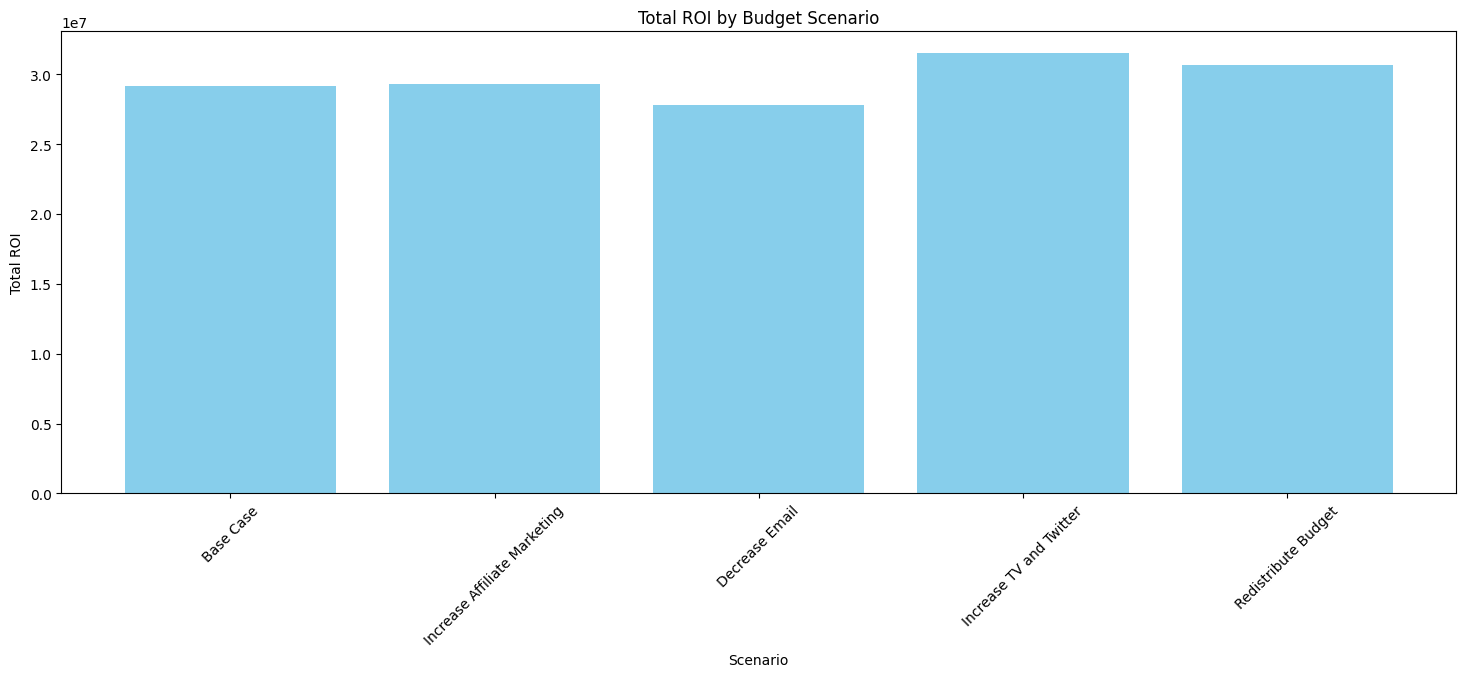

In [8]:
import matplotlib.pyplot as plt

# Bar plot for Total ROI by Scenario
plt.figure(figsize=(18, 6))
plt.bar(scenario_df['Scenario'], scenario_df['Total ROI'], color='skyblue')
plt.title('Total ROI by Budget Scenario')
plt.xlabel('Scenario')
plt.ylabel('Total ROI')
plt.xticks(rotation=45)
plt.show()

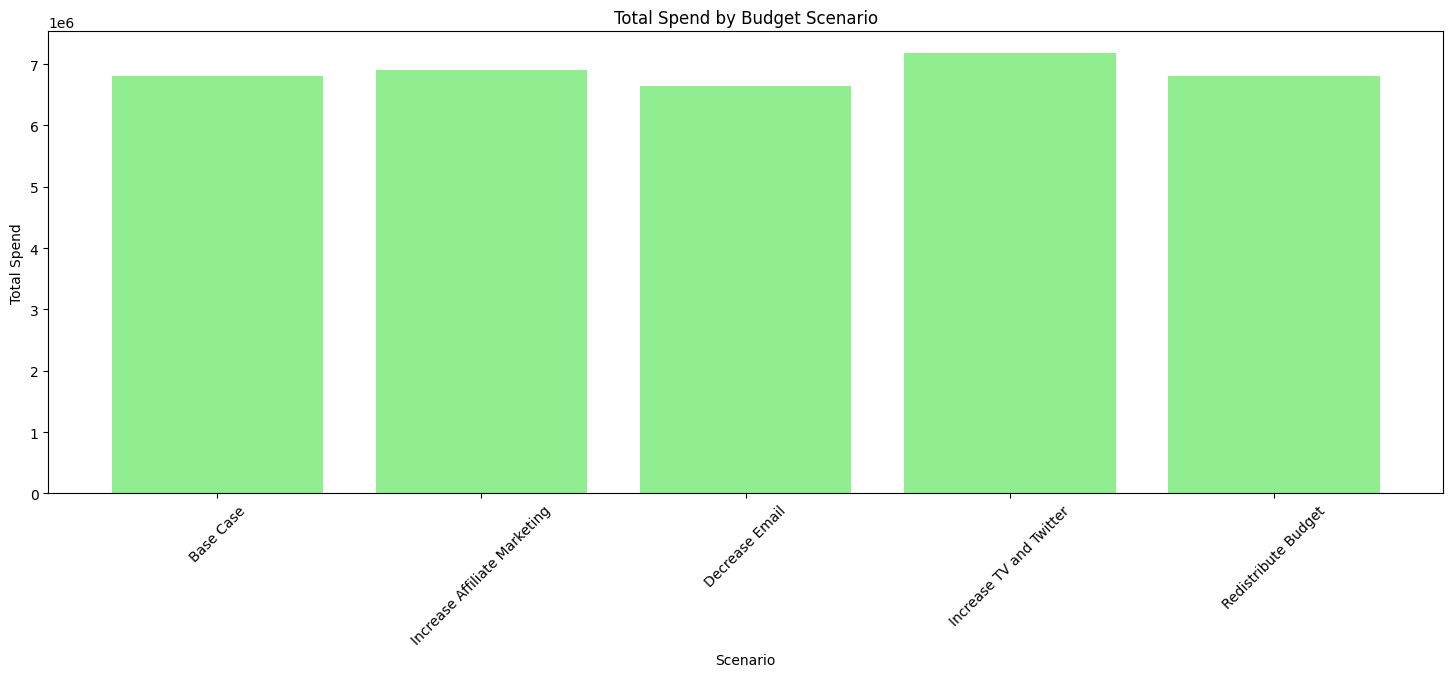

In [9]:
# Bar plot for Total Spend by Scenario
plt.figure(figsize=(18, 6))
plt.bar(scenario_df['Scenario'], scenario_df['Total Spend'], color='lightgreen')
plt.title('Total Spend by Budget Scenario')
plt.xlabel('Scenario')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.show()

### Interpretation of Scenario Simulation Results
The scenario simulation was conducted to evaluate the impact of different budget allocation strategies on Total Spend and Total ROI. Below is a detailed interpretation of the results:

---

**1. Base Case**

Total Spend: $6,800,000

Total ROI: $29,176,000

The Base Case represents the optimal budget allocation derived from the Linear Programming model. This scenario serves as the benchmark for comparing other scenarios. It achieves a high ROI while staying within the total budget limit.

**2. Increase Affiliate Marketing**

Total Spend: $6,900,000

Total ROI: $29,304,000

In this scenario, the budget for Affiliate Marketing was increased by 10%. The results show:

A slight increase in Total Spend ($100,000 more than the Base Case).

A marginal increase in Total ROI ($128,000 more than the Base Case).

Interpretation:

Affiliate Marketing has a moderate ROI (1.28), so increasing its budget does not significantly boost overall ROI.

This scenario may be useful if Affiliate Marketing is a strategic priority, but it does not provide a substantial ROI improvement.

**3. Decrease Email**

Total Spend: $6,640,000

Total ROI: $27,764,800

In this scenario, the budget for Email was decreased by 20%. The results show:

A reduction in Total Spend ($160,000 less than the Base Case).

A significant drop in Total ROI ($1,411,200 less than the Base Case).

Interpretation:

Email has the highest ROI (8.82) among all channels. Reducing its budget negatively impacts overall ROI.

This scenario highlights the importance of Email as a high-performing channel. Cutting its budget is not advisable unless there are other strategic reasons.

**4. Increase TV and Twitter**

Total Spend: $7,175,000

Total ROI: $31,493,500

In this scenario, the budget for TV and Twitter was increased by 15%. The results show:

A higher Total Spend ($375,000 more than the Base Case).

A significant increase in Total ROI ($2,317,500 more than the Base Case).

Interpretation:

Both TV and Twitter have high ROIs (6.06 and 6.26, respectively). Increasing their budgets leads to a substantial boost in overall ROI.

This scenario demonstrates that reallocating budget to high-ROI channels like TV and Twitter can maximize returns, even if it requires a slightly higher total spend.

**5. Redistribute Budget**

Total Spend: $6,800,000

Total ROI: $30,632,000

In this scenario, the budget was redistributed by:

Increasing the budget for Email by $200,000.

Decreasing the budget for Instagram by $200,000.

The results show:

No change in Total Spend (same as the Base Case).

A higher Total ROI ($1,456,000 more than the Base Case).

Interpretation:

Email has the highest ROI (8.82), while Instagram has a lower ROI (1.54). Shifting budget from Instagram to Email improves overall ROI without increasing total spend.

This scenario demonstrates the importance of reallocating budget from low-ROI to high-ROI channels to optimize returns.

### Key Insights and Recommendations

---

**High-ROI Channels:**

Email, TV, and Twitter are the top-performing channels with the highest ROIs. Allocating more budget to these channels can significantly boost overall ROI.

**Low-ROI Channels:**

Instagram and Affiliate Marketing have lower ROIs. While they may serve other strategic purposes (e.g., brand awareness), their budgets should be carefully managed to avoid diluting overall ROI.

**Budget Reallocation:**

Shifting budget from low-ROI channels (e.g., Instagram) to high-ROI channels (e.g., Email) can improve ROI without increasing total spend.

**Scenario Trade-offs:**

Increasing budgets for high-ROI channels (e.g., TV and Twitter) can lead to higher ROI but may require a larger total spend.

Reducing budgets for high-ROI channels (e.g., Email) can significantly harm overall ROI.

---

### Conclusion

**The scenario simulation provides actionable insights for optimizing budget allocation:**

Prioritize high-ROI channels like Email, TV, and Twitter.

Reallocate budget from low-ROI channels to high-ROI channels to maximize returns.

Avoid cutting budgets for high-performing channels unless absolutely necessary.

These findings can guide decision-making to ensure that marketing budgets are allocated efficiently, maximizing ROI while staying within budget constraints.